In [1]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()

In [2]:
cardata = pd.read_csv('car_prices.csv')
cardata.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
print(cardata.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [4]:
cardata.dropna(inplace=True) #drop rows with missing values

In [5]:
make = pd.DataFrame(cardata)
make

frequencies = cardata["make"].value_counts(normalize = True)
frequencies

threshold = 0.001
small_categories = frequencies[frequencies < threshold].index
small_categories

cardata["make"] = cardata["make"].replace(small_categories, "other_make")
cardata["make"].value_counts(normalize = True)

make
Ford             0.171520
Chevrolet        0.114646
Nissan           0.093247
Toyota           0.074764
Dodge            0.057547
Honda            0.052466
Hyundai          0.039505
BMW              0.037070
Kia              0.033511
Chrysler         0.032039
Infiniti         0.029664
Mercedes-Benz    0.029658
Jeep             0.026962
Volkswagen       0.022823
Lexus            0.022038
GMC              0.019514
Mazda            0.014672
Cadillac         0.013370
Lincoln          0.010429
Audi             0.010167
Acura            0.009534
Buick            0.009464
Subaru           0.009250
Ram              0.008562
Pontiac          0.008507
Mitsubishi       0.007751
Volvo            0.006525
MINI             0.006237
Saturn           0.005441
other_make       0.003381
Mercury          0.003326
Scion            0.003271
Land Rover       0.002799
Jaguar           0.002661
Porsche          0.002450
Suzuki           0.002068
HUMMER           0.001626
FIAT             0.001535
Name: p

In [6]:
model = pd.DataFrame(cardata)
model

threshold = 1000
model_count = cardata['model'].value_counts()
small_model = model_count[model_count < threshold].index.tolist()

cardata = cardata[~cardata['model'].isin(small_model)]

In [7]:
body = pd.DataFrame(cardata)
body

threshold = 1000
body_count = cardata['body'].value_counts()
small_body = body_count[body_count < threshold].index.tolist()

cardata = cardata[~cardata['body'].isin(small_body)]

In [8]:
trim = pd.DataFrame(cardata)
trim

threshold = 1000
trim_count = cardata['trim'].value_counts()
small_trim = trim_count[trim_count < threshold].index.tolist()

cardata = cardata[~cardata['trim'].isin(small_trim)]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cardata.iloc[:, :-2],
                                                    cardata.iloc[:, -2],
                                                    test_size = 0.3,
                                                    random_state = 42)

#split train test data set

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196246 entries, 265921 to 247720
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          196246 non-null  int64  
 1   make          196246 non-null  object 
 2   model         196246 non-null  object 
 3   trim          196246 non-null  object 
 4   body          196246 non-null  object 
 5   transmission  196246 non-null  object 
 6   vin           196246 non-null  object 
 7   state         196246 non-null  object 
 8   condition     196246 non-null  float64
 9   odometer      196246 non-null  float64
 10  color         196246 non-null  object 
 11  interior      196246 non-null  object 
 12  seller        196246 non-null  object 
 13  mmr           196246 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 22.5+ MB


In [11]:
X_train["make"].value_counts() #different brands of cars

make
Ford             45862
Chevrolet        28952
Nissan           21409
Toyota           16033
Dodge            13397
Honda            13356
Hyundai           9511
Kia               8799
Chrysler          8749
Jeep              5578
Infiniti          4596
Lexus             3855
GMC               2615
Volkswagen        2583
BMW               2163
Lincoln           1646
MINI              1386
Acura             1186
Cadillac           942
Mazda              916
Mercedes-Benz      899
Ram                884
Pontiac            837
Subaru              74
Buick               18
Name: count, dtype: int64

In [12]:
make_train = X_train["make"].str.split(" ", expand = True)
make_test = X_test["make"].str.split(" ", expand = True)

In [13]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

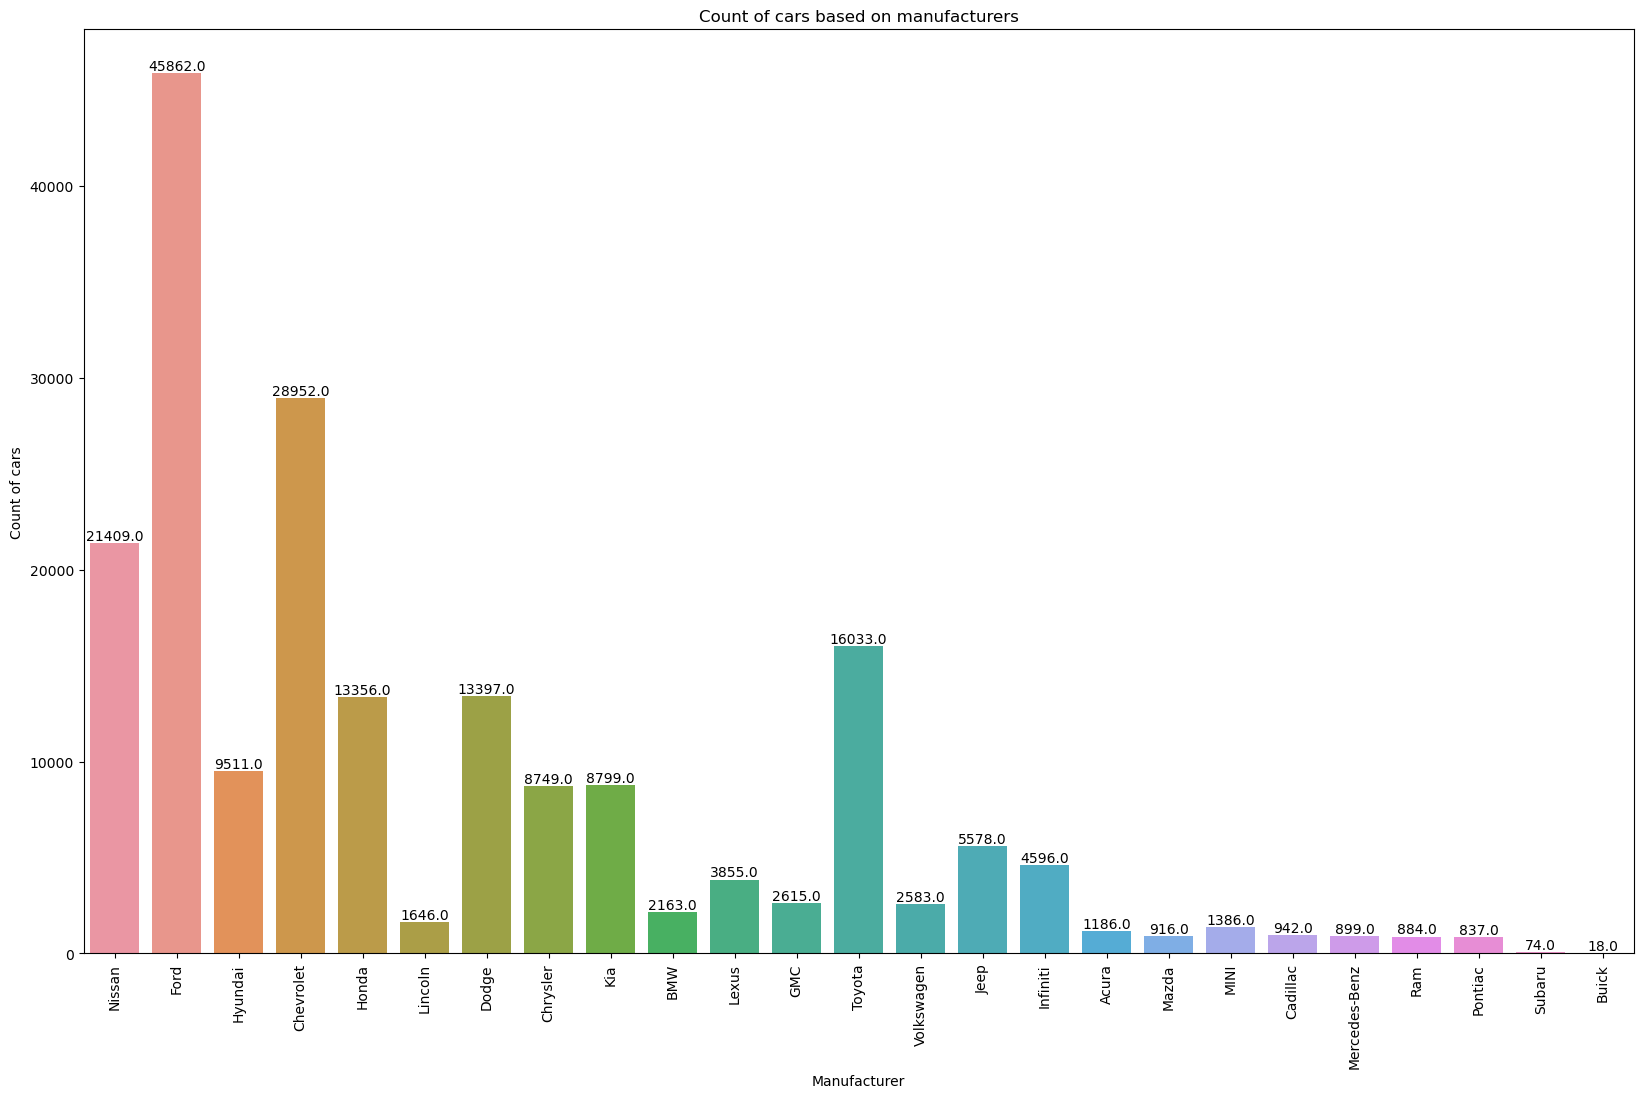

In [14]:
plt.figure(figsize = (20, 12))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [15]:
X_train.drop("make", axis = 1, inplace = True)
X_test.drop("make", axis = 1, inplace = True)

In [16]:
#model

X_train["model"].value_counts()

model
Altima      10436
Fusion       8427
Camry        7019
Escape       6922
F-150        6764
            ...  
4Runner       276
Outback        74
Tundra         43
Sienna         32
LaCrosse       18
Name: count, Length: 106, dtype: int64

In [17]:
model_train = X_train["model"].str.split(" ", expand = True)
model_test = X_test["model"].str.split(" ", expand = True)

In [18]:
X_train["Model"] = model_train[0]
X_test["Model"] = model_test[0]

Text(0, 0.5, 'Count of cars')

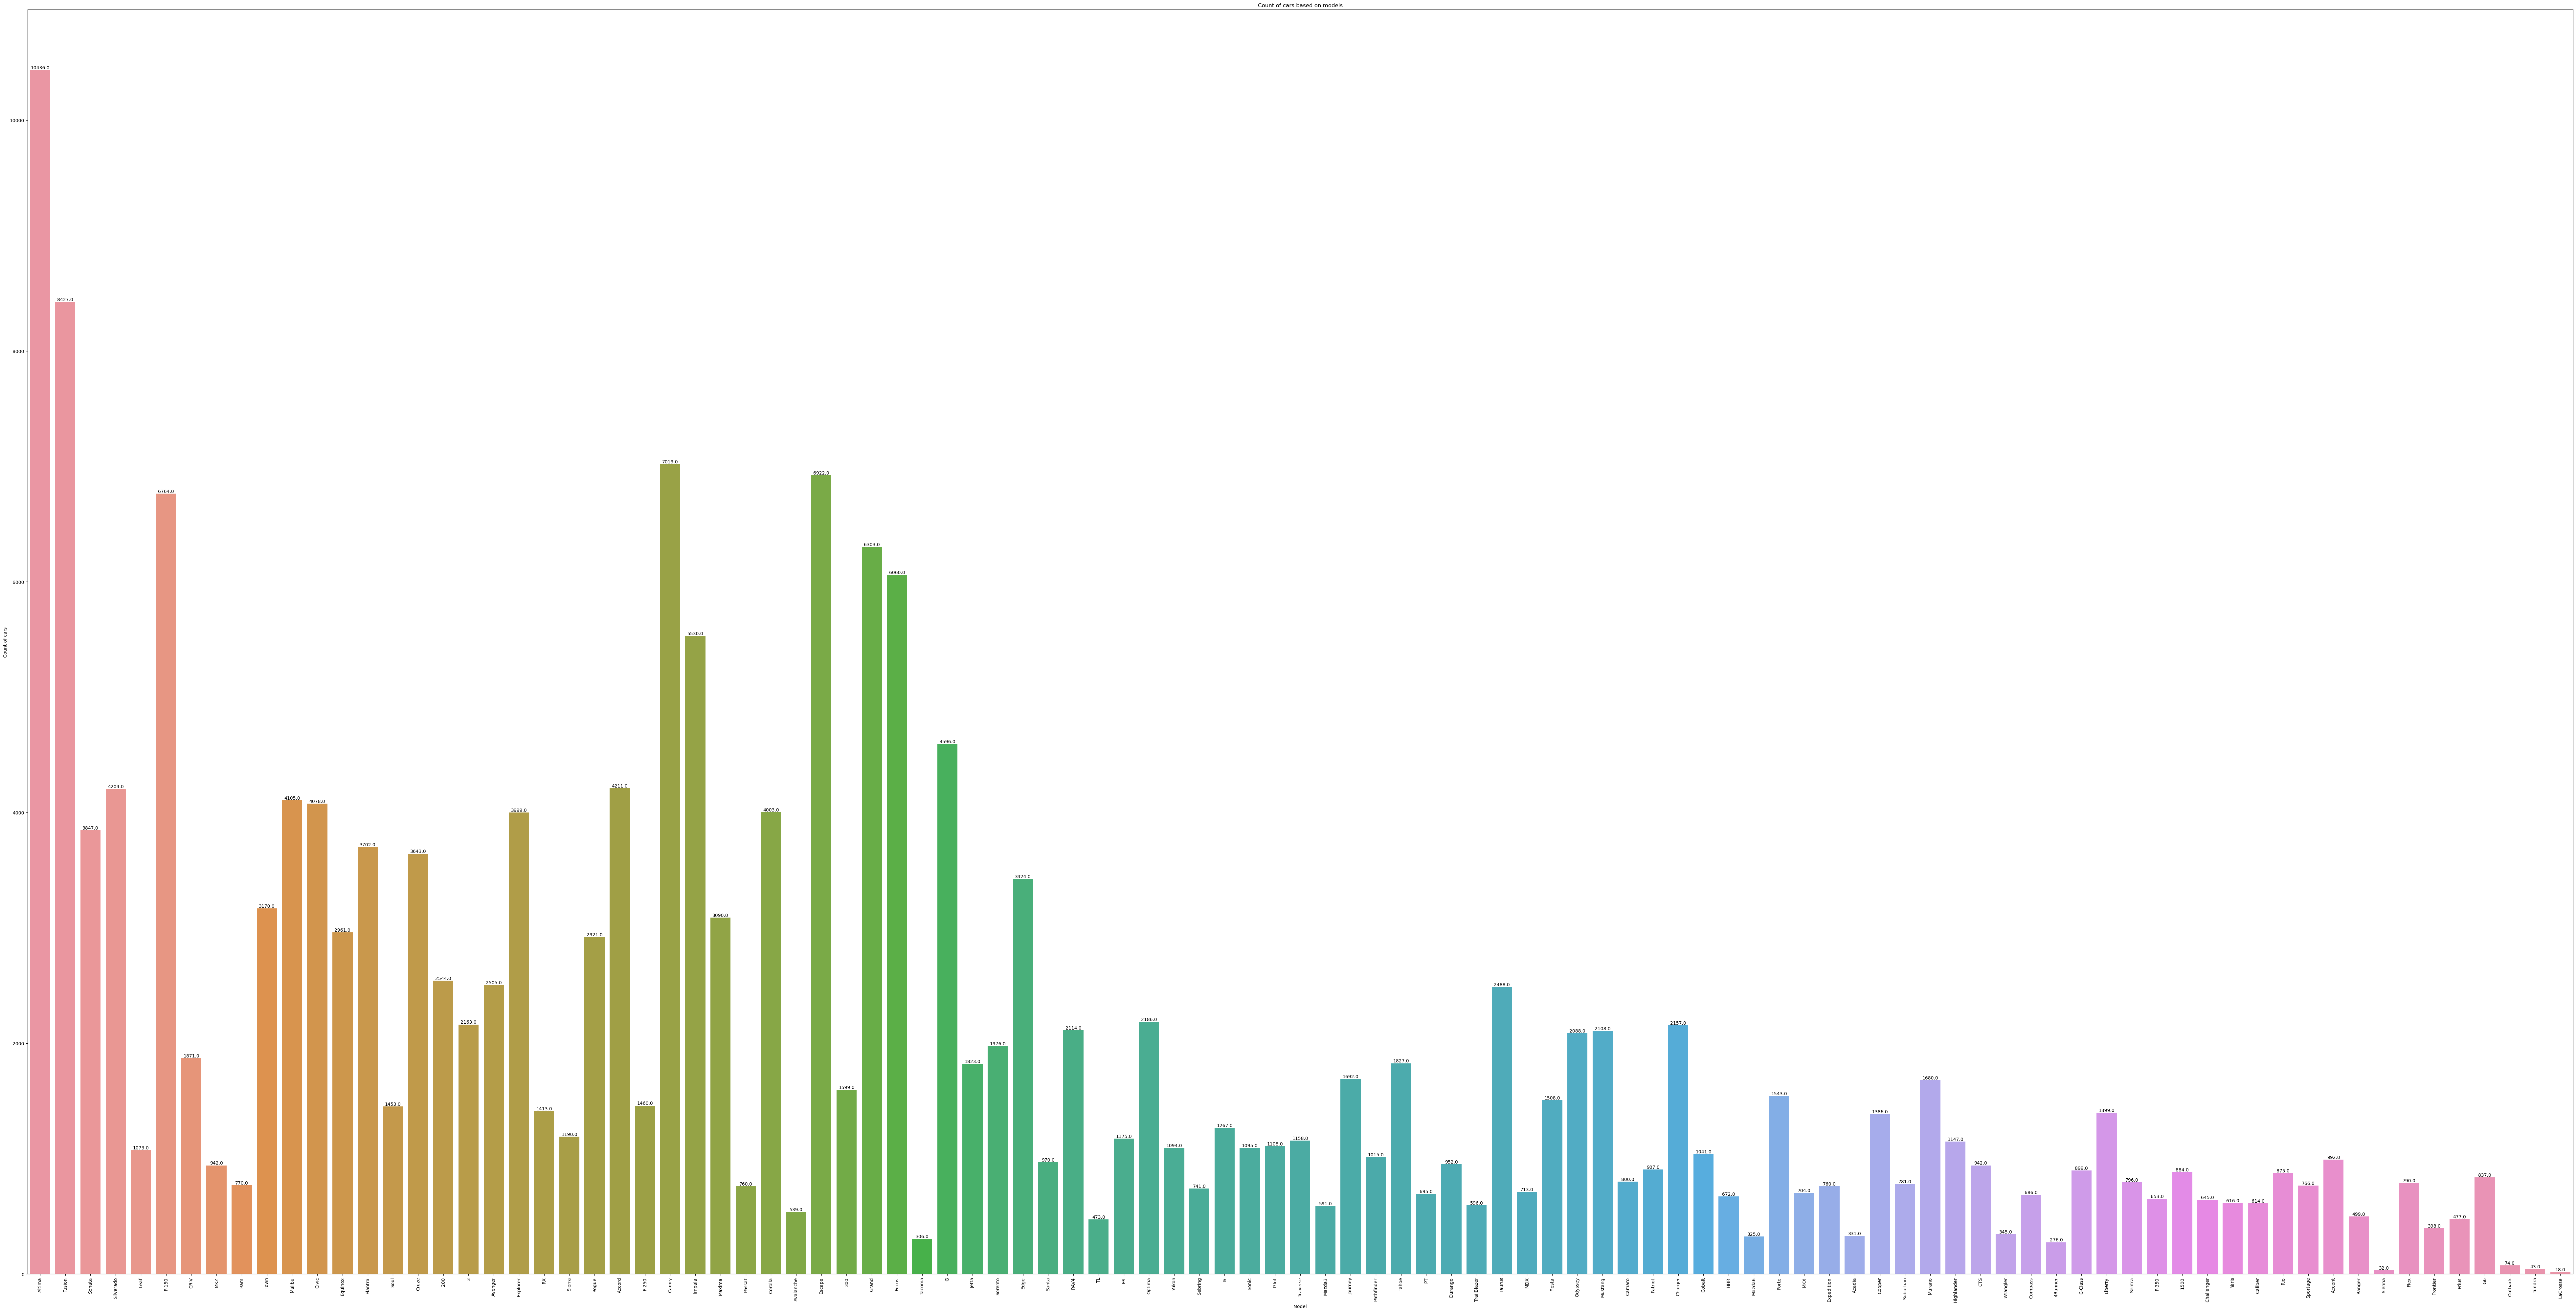

In [19]:
plt.figure(figsize = (100, 50))
plot = sns.countplot(x = 'Model', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on models")
plt.xlabel("Model")
plt.ylabel("Count of cars")

In [20]:
X_train.drop("model", axis = 1, inplace = True)
X_test.drop("model", axis = 1, inplace = True)

In [21]:
#transmission

X_train["transmission"].value_counts()

transmission
automatic    192568
manual         3678
Name: count, dtype: int64

In [22]:
transmission_train = X_train["transmission"].str.split(" ", expand = True)
transmission_test = X_test["transmission"].str.split(" ", expand = True)

In [23]:
X_train["Transmission"] = transmission_train[0]
X_test["Transmission"] = transmission_test[0]

Text(0, 0.5, 'Count of cars')

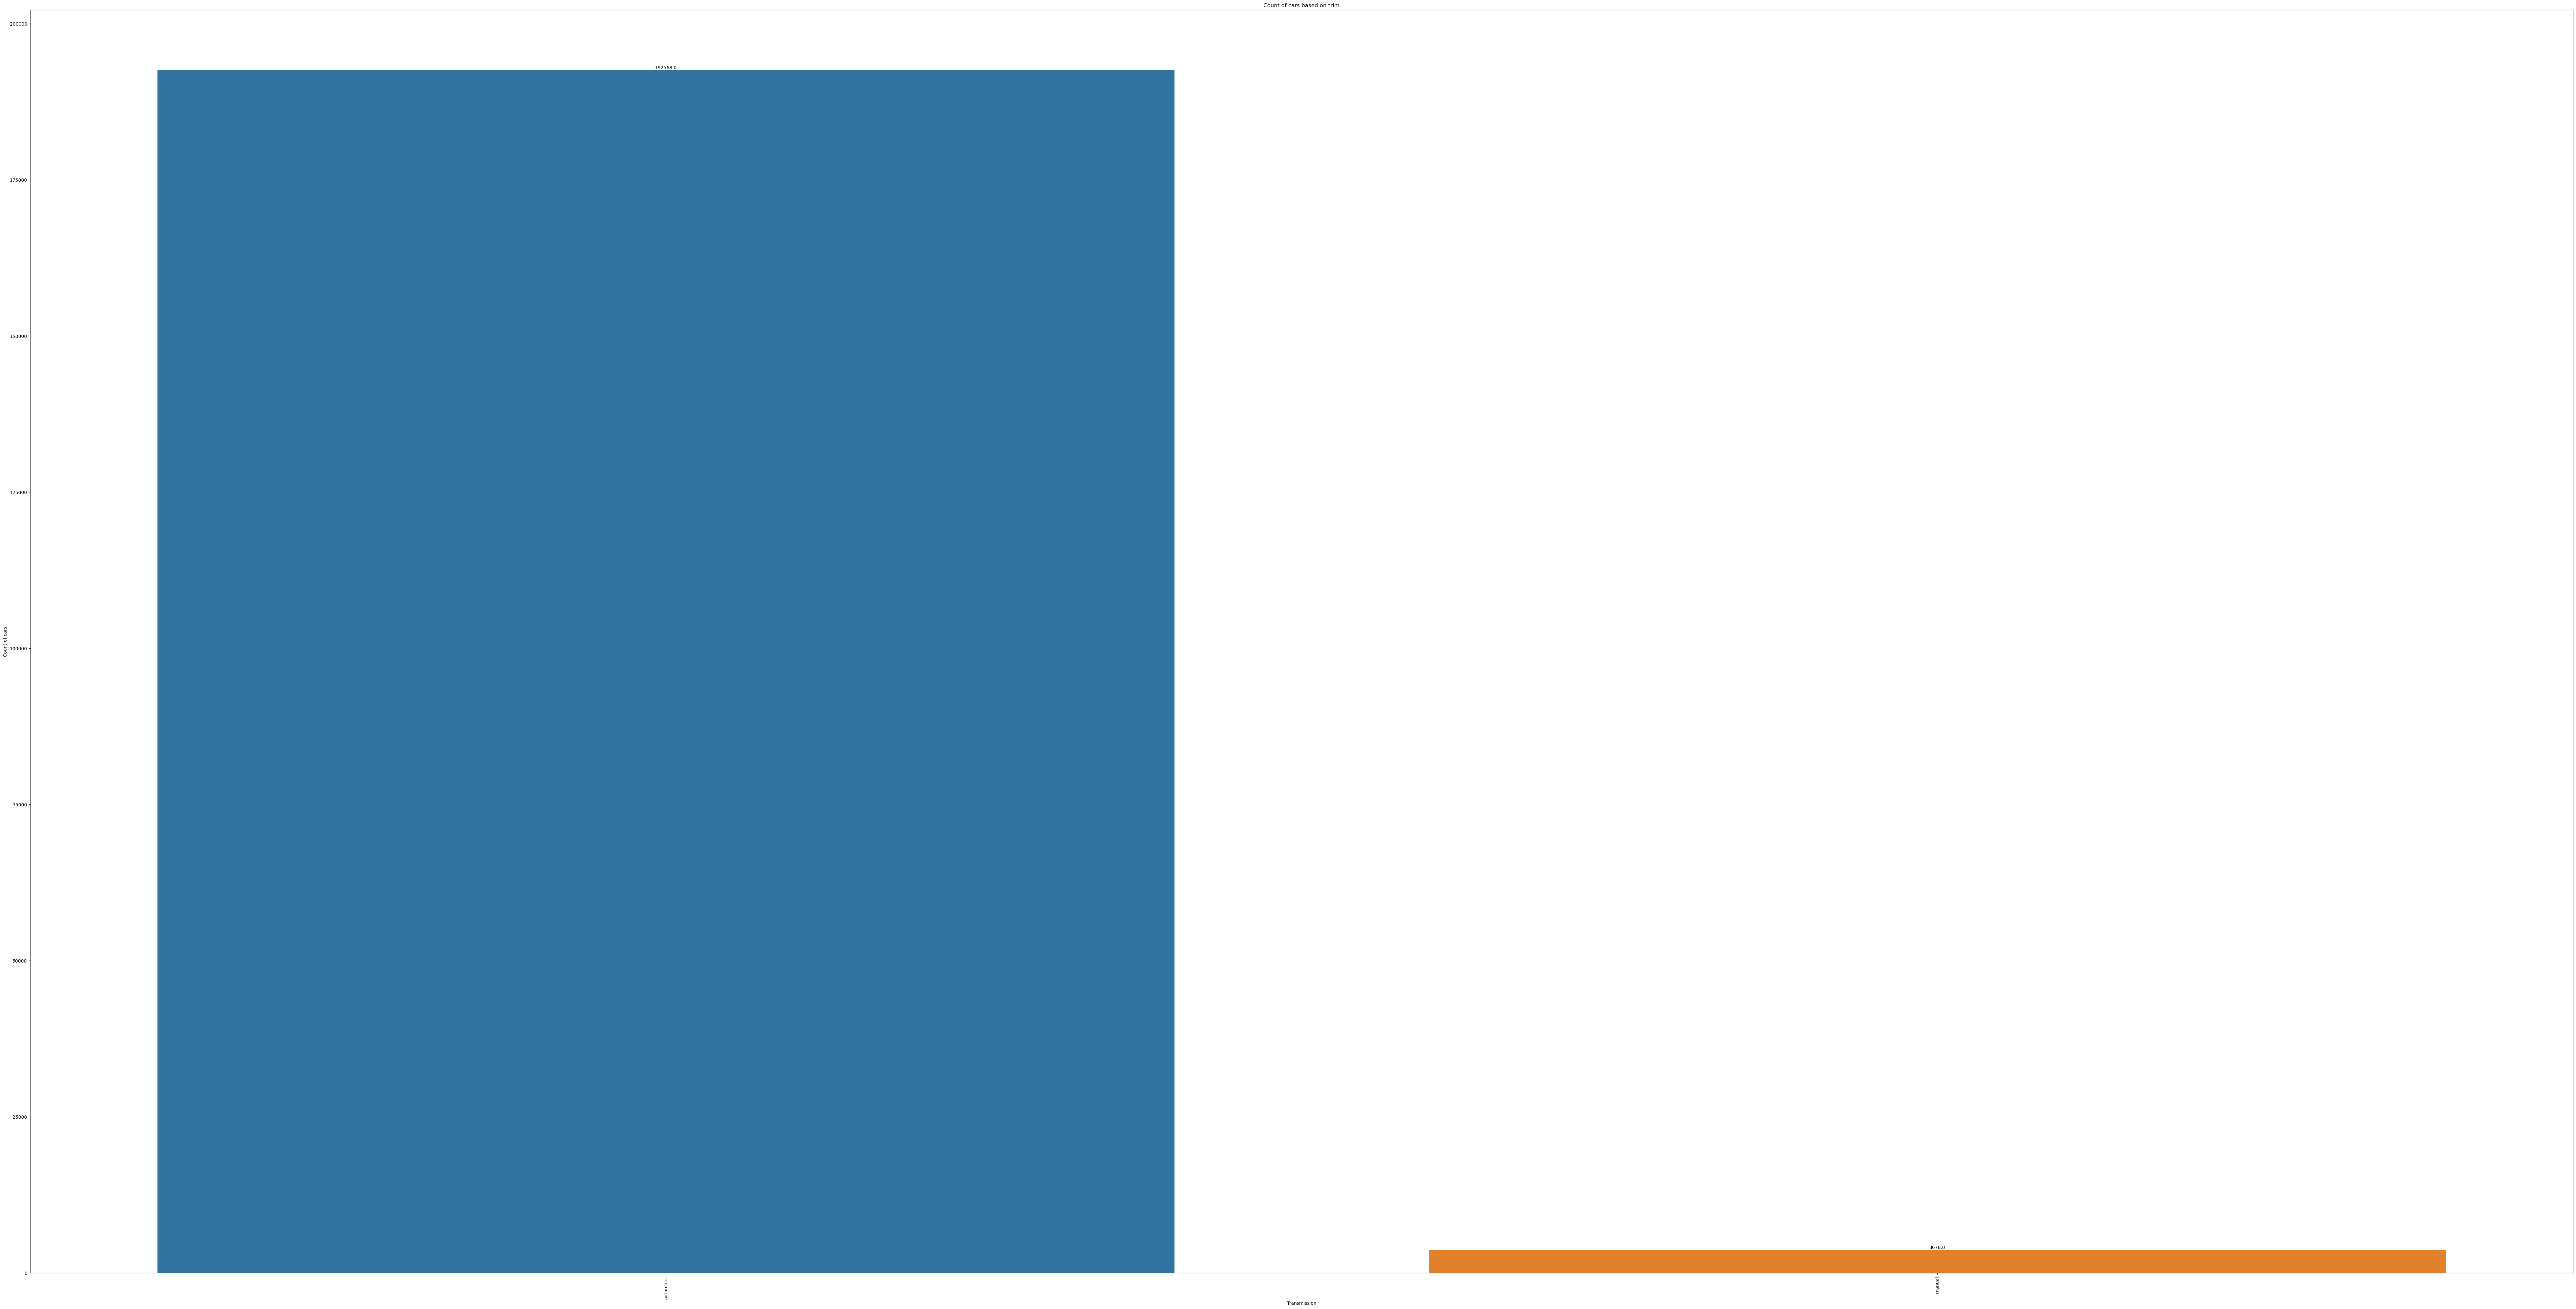

In [24]:
plt.figure(figsize = (100, 50))
plot = sns.countplot(x = 'Transmission', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on trim")
plt.xlabel("Transmission")
plt.ylabel("Count of cars")

In [25]:
X_train.drop("transmission", axis = 1, inplace = True)
X_test.drop("transmission", axis = 1, inplace = True)

In [26]:
#trim

X_train["trim"].value_counts()

trim
SE             25354
Base           16196
LX             12196
LT              9882
XLT             9302
Limited         9009
LE              7517
GLS             6895
2.5 S           6681
LS              6657
SXT             6002
SEL             5991
S               5748
Touring         5744
EX              5135
Sport           3991
2.5             3857
EX-L            3227
LTZ             3214
SV              2734
G37x            2524
SLT             2180
328i            2163
G37 Journey     2072
3.5 SV          2042
Lariat          1961
XL              1933
SL              1928
V6              1913
Titanium        1807
LT Fleet        1630
1LT             1535
Laredo          1517
LS Fleet        1347
SE PZEV         1319
2LT             1210
R/T             1163
+               1008
LT1              966
Denali           952
Work Truck       943
3.5 S            921
i Sport          916
FX4              915
SLE              911
C250 Sport       899
1500 LS          773
GT      

In [27]:
trim_train = X_train["trim"].str.split(" ", expand = True)
trim_test = X_test["trim"].str.split(" ", expand = True)

In [28]:
X_train["Trim"] = trim_train[0]
X_test["Trim"] = trim_test[0]

Text(0, 0.5, 'Count of cars')

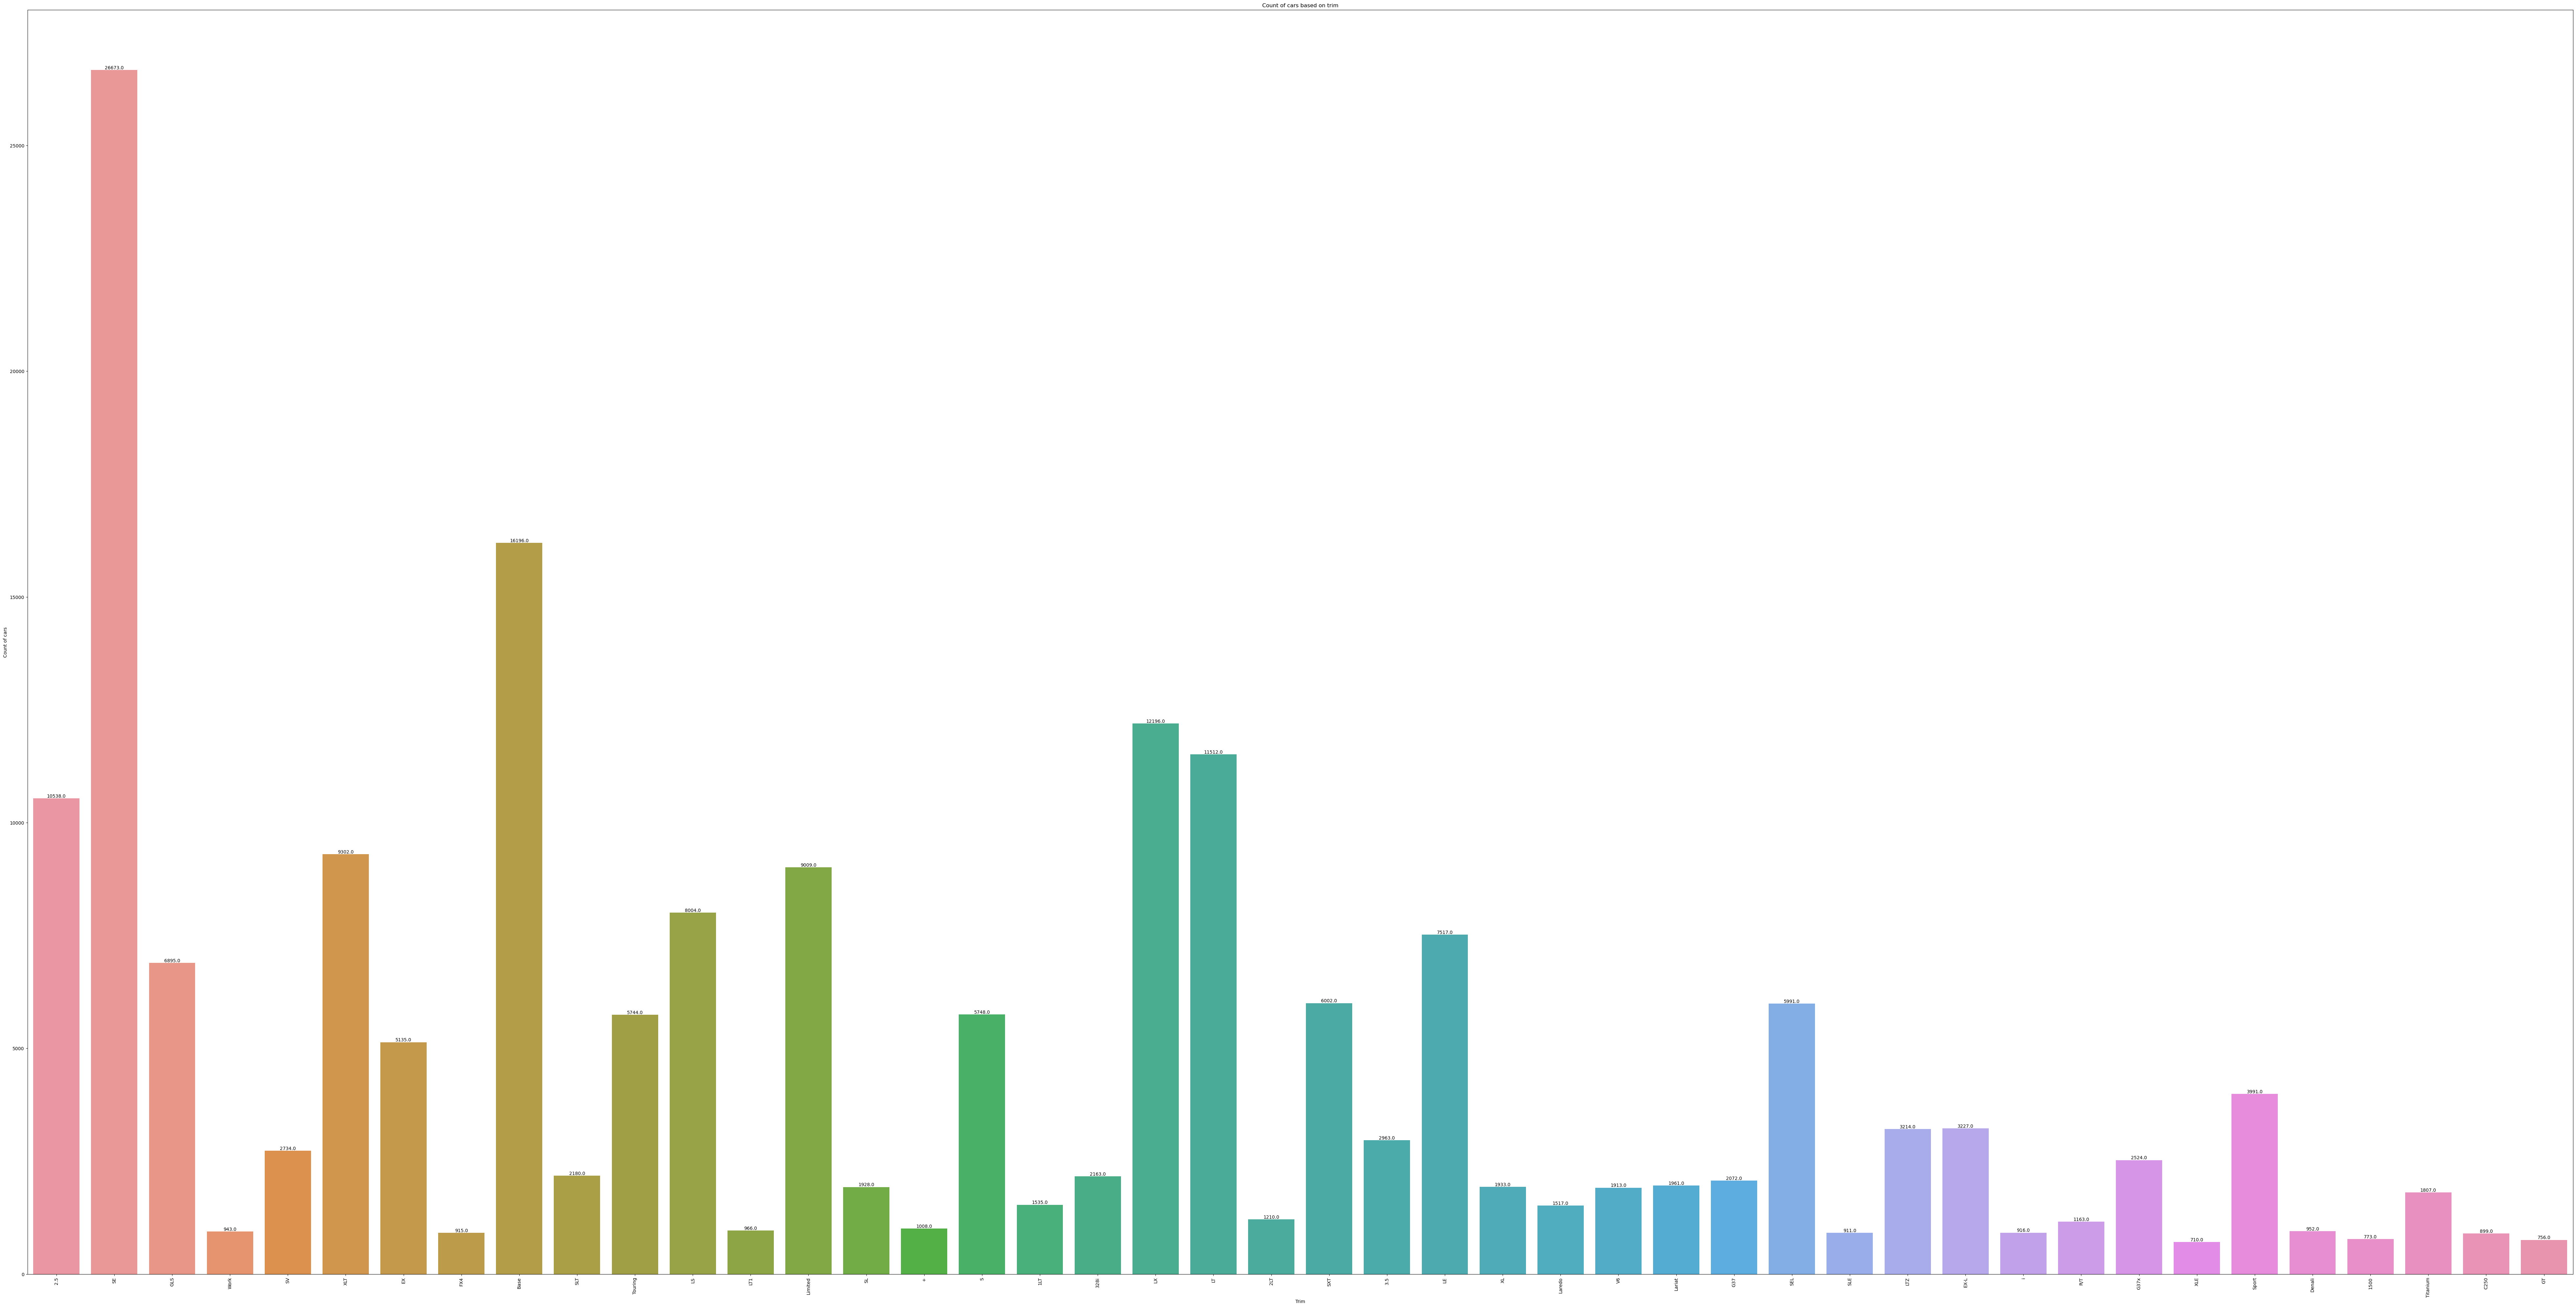

In [29]:
plt.figure(figsize = (100, 50))
plot = sns.countplot(x = 'Trim', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on trim")
plt.xlabel("Trim")
plt.ylabel("Count of cars")

In [30]:
X_train.drop("trim", axis = 1, inplace = True)
X_test.drop("trim", axis = 1, inplace = True)

In [31]:
#body

X_train["body"].value_counts()

body
Sedan           79096
SUV             42311
sedan           16928
suv              8438
Minivan          7782
Hatchback        5305
Crew Cab         4910
Coupe            4280
SuperCrew        3689
Wagon            3643
G Sedan          3490
SuperCab         1979
Regular Cab      1856
Extended Cab     1832
Convertible      1807
minivan          1570
hatchback        1254
crew cab         1220
Quad Cab         1076
coupe             852
supercrew         793
g sedan           769
wagon             674
Double Cab        355
G Coupe           337
Name: count, dtype: int64

In [32]:
body_train = X_train["body"].str.split(" ", expand = True)
body_test = X_test["body"].str.split(" ", expand = True)

In [33]:
X_train["Body"] = body_train[0]
X_test["Body"] = body_test[0]

Text(0, 0.5, 'Count of cars')

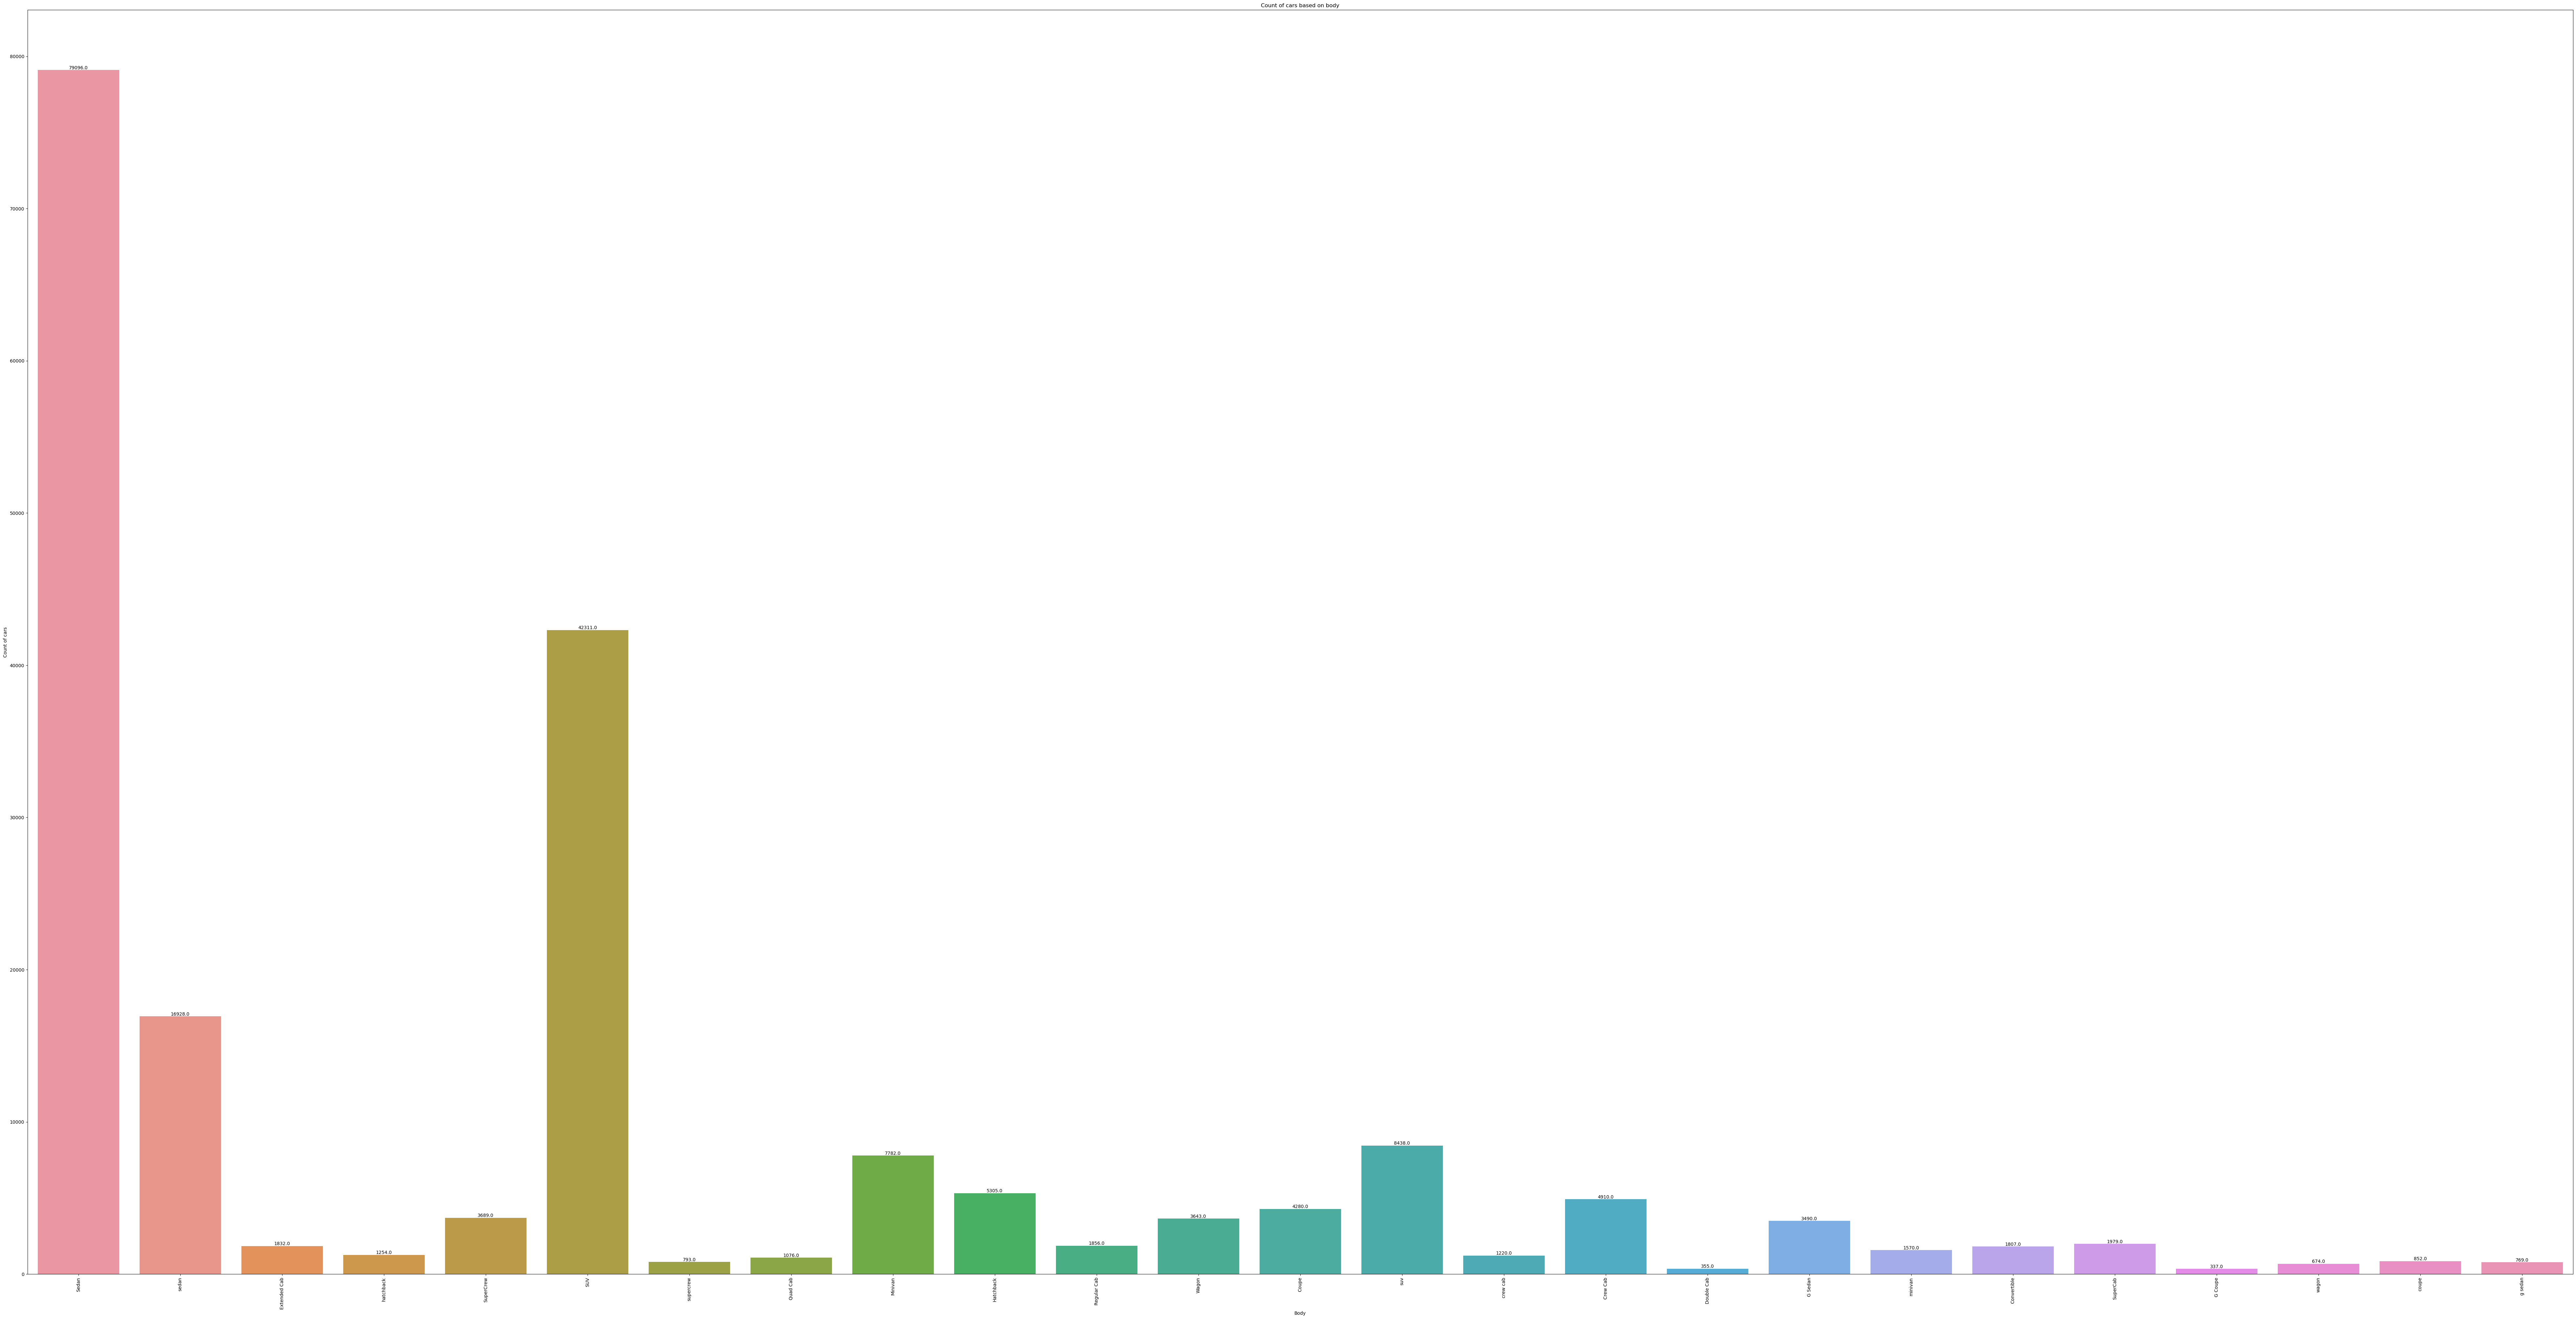

In [34]:
plt.figure(figsize = (100, 50))
plot = sns.countplot(x = 'body', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on body")
plt.xlabel("Body")
plt.ylabel("Count of cars")

In [35]:
X_train.drop("body", axis = 1, inplace = True)
X_test.drop("body", axis = 1, inplace = True)

In [36]:
#odometer

X_train["odometer"]

265921     22178.0
491240     20762.0
193966     94843.0
210353     29726.0
311690    151074.0
            ...   
243230     65967.0
513896     19028.0
266917     17497.0
294780     20851.0
247720     19808.0
Name: odometer, Length: 196246, dtype: float64

In [37]:
print(sum(X_train["odometer"].isnull()))
print(sum(X_test["odometer"].isnull()))

0
0


In [38]:
print(X_train.columns)

Index(['year', 'vin', 'state', 'condition', 'odometer', 'color', 'interior',
       'seller', 'mmr', 'Manufacturer', 'Model', 'Transmission', 'Trim',
       'Body'],
      dtype='object')


In [39]:
X_train.drop("year", axis = 1, inplace = True)
X_test.drop("year", axis = 1, inplace = True)

X_train.drop("vin", axis = 1, inplace = True)
X_test.drop("vin", axis = 1, inplace = True)

X_train.drop("state", axis = 1, inplace = True)
X_test.drop("state", axis = 1, inplace = True)

X_train.drop("color", axis = 1, inplace = True)
X_test.drop("color", axis = 1, inplace = True)

X_train.drop("interior", axis = 1, inplace = True)
X_test.drop("interior", axis = 1, inplace = True)

X_train.drop("seller", axis = 1, inplace = True)
X_test.drop("seller", axis = 1, inplace = True)

X_train.drop("mmr", axis = 1, inplace = True)
X_test.drop("mmr", axis = 1, inplace = True)

X_train.drop("condition", axis = 1, inplace = True)
X_test.drop("condition", axis = 1, inplace = True)

In [40]:
#Data Processing

X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Trim", "Body", "Model","Transmission"],
                         drop_first = True)

In [41]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Trim", "Body", "Model","Transmission"],
                         drop_first = True)

In [42]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [43]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.7827712200389354

In [44]:
linreg.fit(X_train, y_train)

LinearRegression()

Intercept of Regression 	: b =  19453.303594522673
Coefficients of Regression 	: a =  [-9.69883287e-02  1.53577457e+03  6.26030775e+02  4.14717764e+01
 -8.98637402e+02 -1.82877390e+03 -3.86695495e+03  1.42642481e+03
  3.04813481e+03  1.31844677e+02 -3.43988043e+03  1.21070262e+03
 -3.16854740e+03 -2.84745400e+03  5.88078956e+03  3.15896920e+03
 -8.20133565e+02 -1.56356887e+03  1.73004763e+03 -3.19713519e+03
 -1.80951870e+03  2.27402881e+03 -5.15333835e+02  2.76233172e+02
 -1.98902422e+03 -1.63454201e+04  5.15220068e+02 -1.87241482e+02
  1.57893540e+03  1.49077212e+03  1.53577457e+03 -1.82263033e+03
  1.73004763e+03  1.25873154e+03 -1.17200991e+03  2.55482974e+02
  9.80603677e+02  5.45011926e+02  6.65690692e+02 -9.54508415e+02
  8.85973526e+02 -1.37282824e+03 -1.60279978e+03  3.98002353e+02
 -7.58141665e+02  4.07102763e+03 -1.90427702e+03 -2.87593525e+03
  1.15764142e+03  1.67165293e+03  4.57689823e+03 -9.53622253e+02
 -8.42192995e+02 -4.31502017e-01 -1.21447170e+01 -2.81334997e+03
 -6.

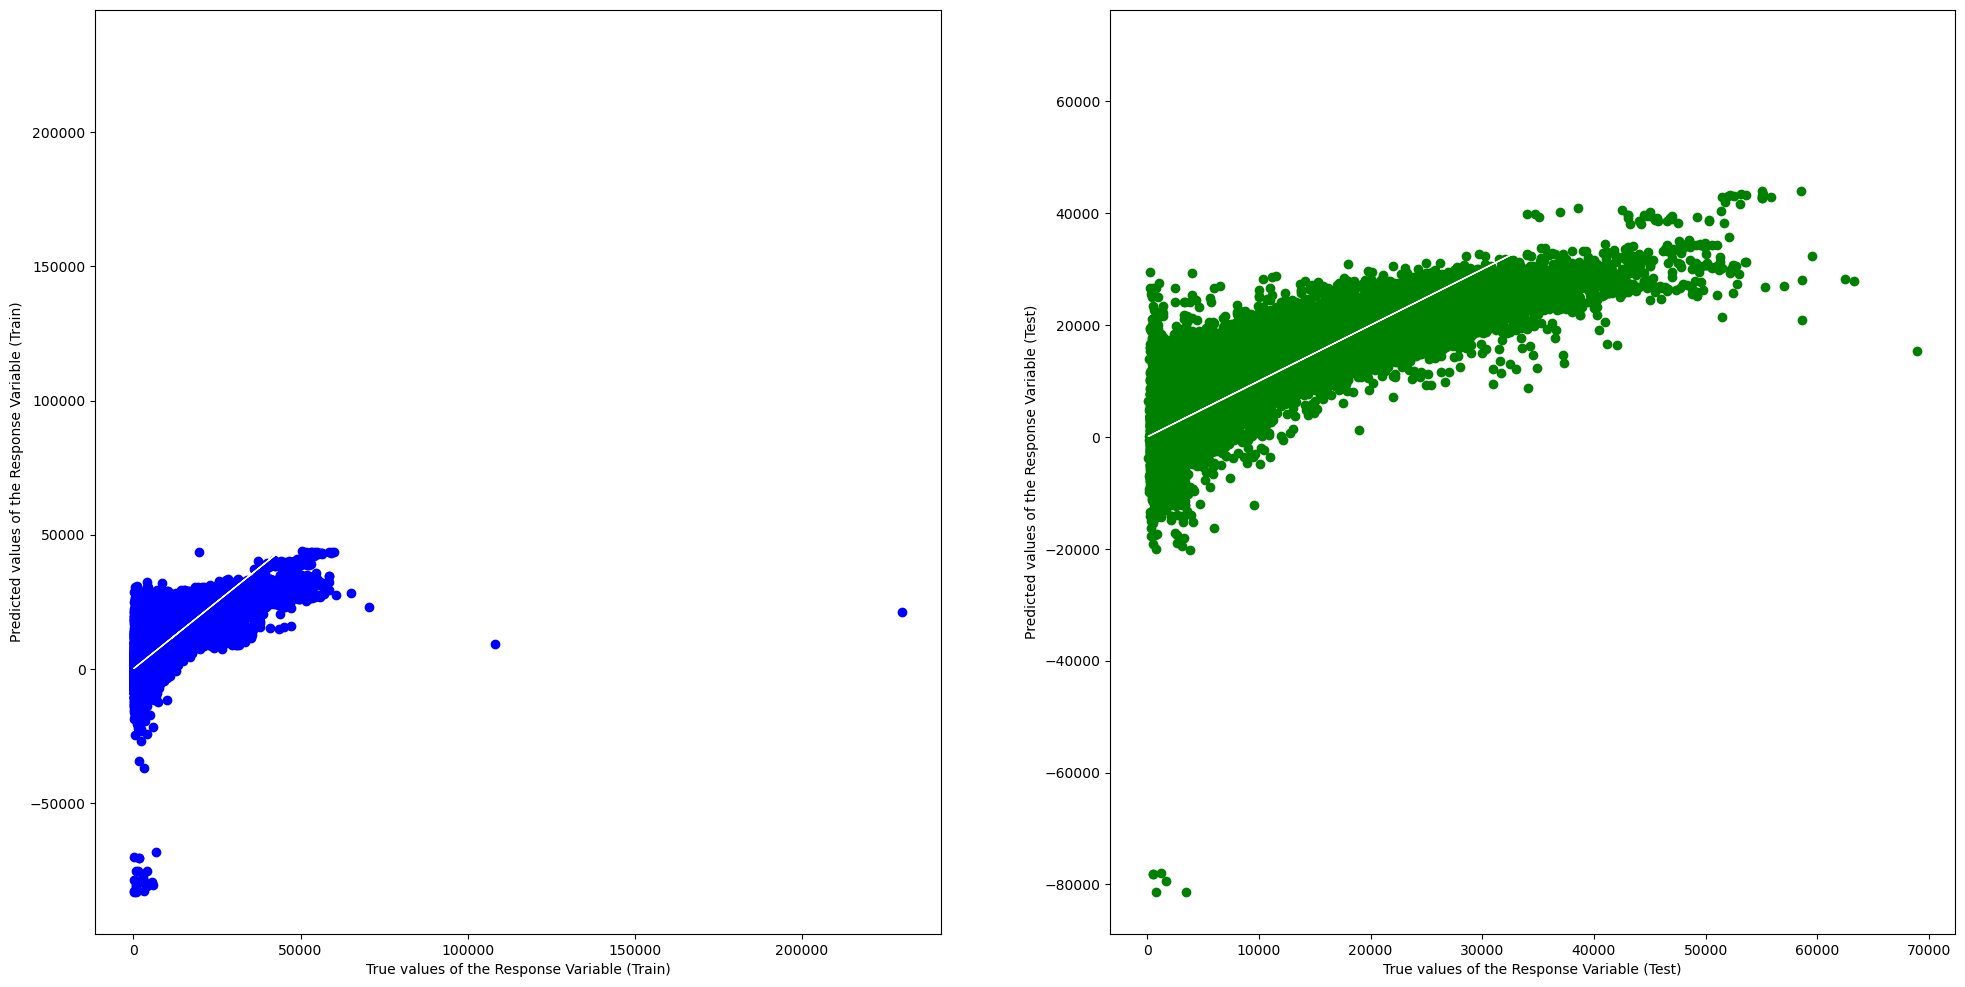

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7741466871711965
Mean Squared Error (MSE) 	: 12012286.074080735

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7827712200389354
Mean Squared Error (MSE) 	: 11406758.054621385



In [45]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [46]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.862363068689188